In [55]:
import numpy as np
import matplotlib.pyplot as plt
import mars_troughs as mt
from importlib import reload
from mars_troughs import DATAPATHS, Model, CustomAccuModel, CustomLagModel
xdata,ydata=np.loadtxt(DATAPATHS.TMP, unpack=True)
xdata=xdata*1000 #km to m

In [122]:
#initialize custom models. 
#accu=coeff*1/ins(t)
accu_coeff=3e-2

#lag=intercept+linearCoeff*time+quadCoeff*time**2
lag_intercept=1e-6
lag_linearCoeff=5e-8
lag_quadCoeff=5e-12

custom_accu_model=CustomAccuModel(accu_coeff)
custom_lag_model=CustomLagModel(lag_intercept,lag_linearCoeff,lag_quadCoeff)


In [123]:
#initialize trough object
errorbar = np.sqrt(1.6) #errorbar in pixels on the datapoints
angle=5.0
tr = mt.Trough(None, None,custom_accu_model,custom_lag_model,None, None,
                errorbar,angle)
tr.compute_model_splines()
#rename times, insolation, accumulation and lag per time
times=tr.ins_times
inst=tr.insolation;

Text(0, 0.5, 'Insolation (W/m^2)')

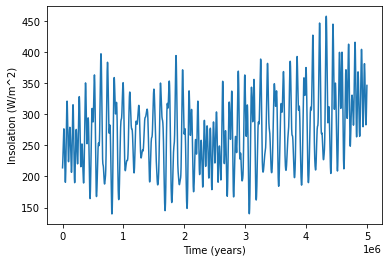

In [124]:
#insolation data
plt.plot(times,inst)
plt.xlabel('Time (years)')
plt.ylabel('Insolation (W/m^2)')

Text(0.5, 1.0, "{'coeff': 0.03}")

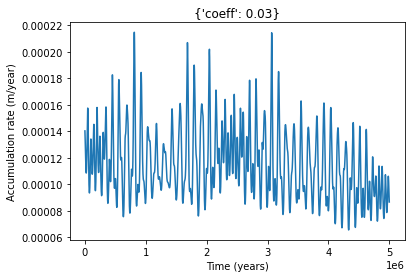

In [125]:
#accumulation at times t
accuT=tr.accuModel.get_accumulation_at_t(times)
plt.plot(times,accuT)
plt.xlabel('Time (years)')
plt.ylabel('Accumulation rate (m/year)')
accuParNames=tr.accuModel.parameters
plt.title(accuParNames)

Text(0.5, 1.0, "{'intercept': 1e-06, 'linearCoeff': 5e-08, 'quadCoeff': 5e-12}")

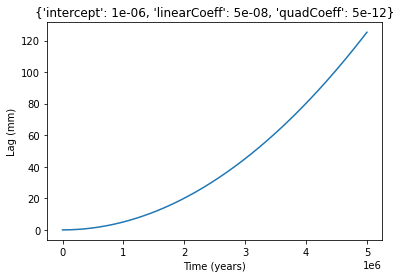

In [126]:
#lag per time
lagT=tr.lagModel.get_lag_at_t(times)
plt.plot(times,lagT)
plt.xlabel('Time (years)')
plt.ylabel('Lag (mm)')
lagParNames=tr.lagModel.parameters
plt.title(lagParNames)

Text(0, 0.5, 'x (m)')

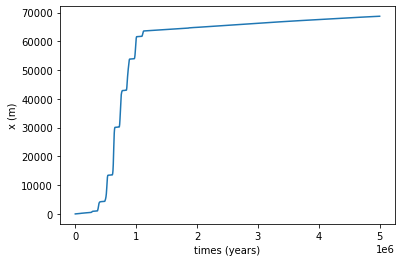

In [127]:
#plot x and y per time
x,y=tr.get_trajectory(times)
plt.plot(times,x)
plt.xlabel('times (years)')
plt.ylabel('x (m)')


Text(0, 0.5, 'y (m)')

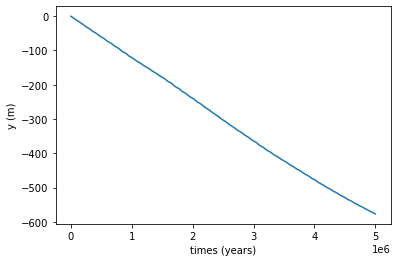

In [128]:
#plot x and y per time
plt.plot(times,y)
plt.xlabel('times (years)')
plt.ylabel('y (m)')


Text(0, 0.5, 'Vertical distance (m)')

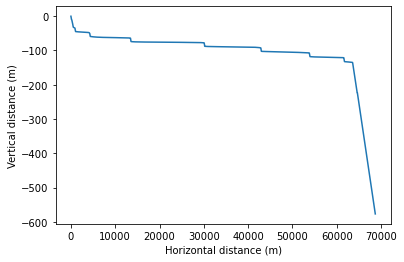

In [129]:
# TMP
plt.plot(x,y)
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Vertical distance (m)')

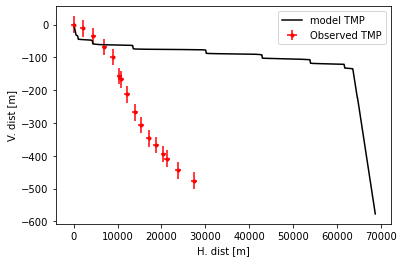

In [130]:
#compare with observed TMP
plt.plot(x, y, c='k',label='model TMP')
xerr, yerr = tr.errorbar*tr.meters_per_pixel
plt.errorbar(x=xdata, xerr=xerr, y=ydata, yerr=yerr, c='r', marker='.', ls='',label='Observed TMP')
plt.xlabel("H. dist [m]")
plt.ylabel("V. dist [m]")
ax=plt.gca()
ax.legend()